# Examine $\xi$ near oscillaating and undetermined stability results

Examine the profile fit, the xi function and result for profiles that are near oscillating stabilities or for which no stability can be determined. 

In [42]:
#imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import sys
sys.path.append('..')
sys.path.append('../scipy_mod')

import numpy as np
from scipy.interpolate import splev

import equil_solver as es
import newcomb_simple as new
reload(new)

from copy import deepcopy

# A stable case

In [2]:
#parameters
k_bar = 1.0
lambda_bar = 1.0 
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-2
max_step = 1e-2
nsteps = 1e3
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 20,
                  'points_transition': 20,
                  'core_radius_norm': 0.9,
                  'transition_width_norm': 0.033,
                  'skin_width_norm': 0.034}

In [3]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)

# Look at profile

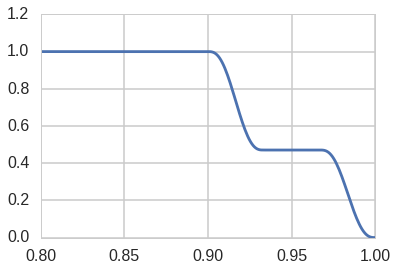

In [162]:
r = np.linspace(0.8, 1, 250)
j_z = splev(r, params['j_z'])
plt.plot(r, j_z)

$\delta W$

In [163]:
results[2]

2.2507152684076299

In [164]:
results[4].shape

(250,)

$\xi$

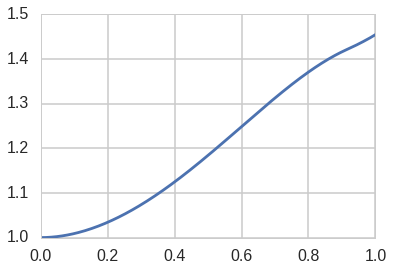

In [165]:
r = np.linspace(0, 1, 250)
plt.plot(r, results[4])
plt.show()

$\xi'$

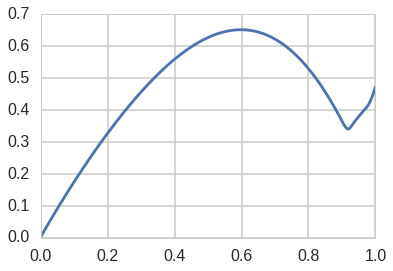

In [166]:
r = np.linspace(0, 1, 250)
plt.plot(r, results[5])
plt.show()

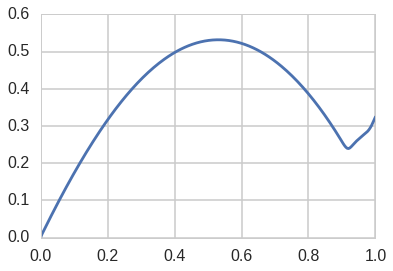

In [167]:
plt.plot(r, results[5]/ results[4])

# A case in the large undetermined region

In [50]:
#parameters
k_bar = 1.
lambda_bar = 2.5
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda_odeint'
diagnose = True
stiff = False
use_jac = True
adapt_step_size = True
adapt_min_steps = 5e4
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 5000,
                  'points_skin': 5000,
                  'points_transition': 5000,
                  'core_radius_norm': 0.97,
                  'transition_width_norm': 0.01,
                  'skin_width_norm': 0.01}

In [49]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac,
                        adapt_step_size=adapt_step_size,
                        adapt_min_steps=adapt_min_steps)

Integration to plasma edge did not succeed. Can not determine external stability at k = 1.000.


/home/jensv/anaconda/lib/python2.7/site-packages/scipy/integrate/_ode.py:372: UserWarning: No integrator name match with 'odeint' or is not available.
  'available.' % name)


In [ ]:
results

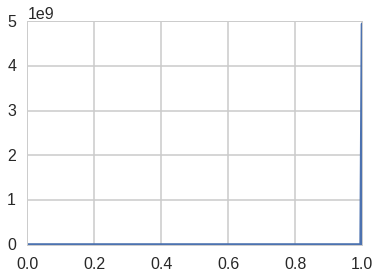

In [205]:
r = np.linspace(0, 1, 250)
plt.plot(r, results[4])

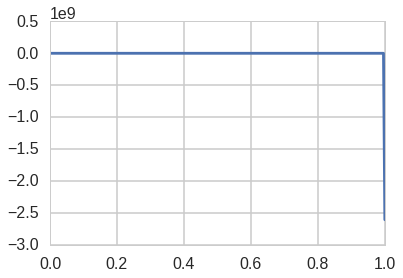

In [206]:
r = np.linspace(0, 1, 250)
plt.plot(r, results[5])

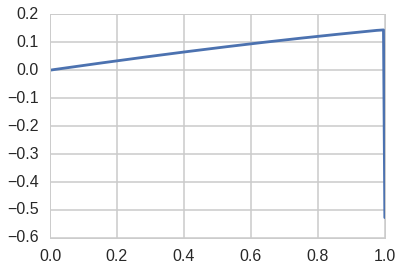

In [207]:
r = np.linspace(0, 1, 250)
plt.plot(r, results[5]/results[4])

Test

In [225]:
#parameters
k_bar = 0.4
lambda_bar = 1.5
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.997,
                  'transition_width_norm': 0.001,
                  'skin_width_norm': 0.001}

In [226]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)

In [227]:
results

(False,
 True,
 -1.2041061402915374,
 None,
 array([  1.00000000e+00,   1.00000198e+00,   1.00000680e+00,
          1.00001438e+00,   1.00002470e+00,   1.00003777e+00,
          1.00005359e+00,   1.00007216e+00,   1.00009346e+00,
          1.00011750e+00,   1.00014428e+00,   1.00017380e+00,
          1.00020604e+00,   1.00024102e+00,   1.00027873e+00,
          1.00031916e+00,   1.00036231e+00,   1.00040818e+00,
          1.00045678e+00,   1.00050809e+00,   1.00056211e+00,
          1.00061885e+00,   1.00067830e+00,   1.00074045e+00,
          1.00080532e+00,   1.00087288e+00,   1.00094315e+00,
          1.00101611e+00,   1.00109178e+00,   1.00117014e+00,
          1.00125119e+00,   1.00133493e+00,   1.00142136e+00,
          1.00151048e+00,   1.00160229e+00,   1.00169677e+00,
          1.00179394e+00,   1.00189379e+00,   1.00199631e+00,
          1.00210151e+00,   1.00220938e+00,   1.00231992e+00,
          1.00243313e+00,   1.00254901e+00,   1.00266755e+00,
          1.00278875e+00, 

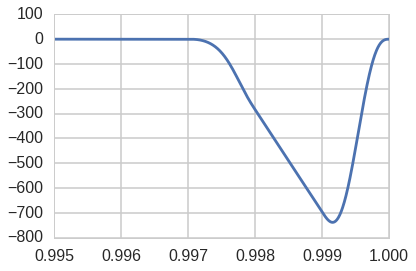

In [217]:
r = np.linspace(0.995, 1, 1000)
j_z = splev(r, params['p_prime'])
plt.plot(r, j_z)

# Another case in the undetermined region

In [218]:
#parameters
k_bar = 0.6
lambda_bar = 2.0
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-5
max_step = 1e-4
nsteps = 1e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': -1,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 50,
                  'points_skin': 20,
                  'points_transition': 20,
                  'core_radius_norm': 0.997,
                  'transition_width_norm': 0.001,
                  'skin_width_norm': 0.001}

In [219]:
#create profile and determine external stability
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)

In [220]:
results

(False,
 True,
 -2.0930509794751866,
 None,
 array([  1.00000000e+00,   1.00000432e+00,   1.00001480e+00,
          1.00003128e+00,   1.00005374e+00,   1.00008218e+00,
          1.00011661e+00,   1.00015700e+00,   1.00020336e+00,
          1.00025569e+00,   1.00031397e+00,   1.00037821e+00,
          1.00044840e+00,   1.00052454e+00,   1.00060663e+00,
          1.00069465e+00,   1.00078861e+00,   1.00088849e+00,
          1.00099431e+00,   1.00110605e+00,   1.00122372e+00,
          1.00134729e+00,   1.00147679e+00,   1.00161219e+00,
          1.00175349e+00,   1.00190070e+00,   1.00205381e+00,
          1.00221281e+00,   1.00237771e+00,   1.00254849e+00,
          1.00272516e+00,   1.00290771e+00,   1.00309614e+00,
          1.00329044e+00,   1.00349062e+00,   1.00369667e+00,
          1.00390858e+00,   1.00412635e+00,   1.00434999e+00,
          1.00457948e+00,   1.00481482e+00,   1.00505602e+00,
          1.00530307e+00,   1.00555596e+00,   1.00581469e+00,
          1.00607926e+00, 